In [46]:
# Quelques imports
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Circle, PathPatch
import matplotlib.cbook as cbook
import time as t
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d

In [31]:
#Lecture du fichier
file = "Historique des positions raphael 140218.json"
df = pd.read_json(file)
#print(df)

donnee=df.get("locations")
#print(donnee)

#Récupération des latitudes, longitudes et des dates
lat=[]
long=[]
temps=[]

for i in range(len(donnee)):
    lat.append(donnee[i]["latitudeE7"]/1e7)
    long.append(donnee[i]["longitudeE7"]/1e7)
    temps.append(donnee[i]["timestampMs"])

Le programme conv permet de convertir la liste des temps (de type string) en une liste des temps de type float, également utilisable par le module time.

In [32]:
def conv(temps):
    n = len(temps)
    liste = [0]*n
    for i in range(n):
        t0 = 0.001*float(temps[i])
        liste[i]=t0
    return liste

In [33]:
temps = conv(temps)

print(temps[:10])

[1518621002.1890001, 1518620400.173, 1518619800.762, 1518619722.996, 1518619658.223, 1518619504.372, 1518618600.943, 1518616800.29, 1518614850.747, 1518614772.288]


Le programme j_annee donne la liste des jours de l'année correspondant aux temps de type "time" de la liste des temps

In [34]:
def j_annee(temps):
    n = len(temps)
    liste = [0]*n
    for i in range(n):
        liste[i]=t.localtime(temps[i])[7]
    return liste

In [35]:
jour_temps = j_annee(temps)
annuaire_jours = list(set(jour_temps))

print(jour_temps[:10])
print(annuaire_jours[:10])

[45, 45, 45, 45, 45, 45, 45, 45, 45, 45]
[3, 4, 5, 6, 7, 9, 10, 11, 12, 13]


La présence du 7 par exemple indique qu'on a deux relevés géographiques effectués un 7 Janvier (7e jour de l'année)

On remarque qu'on a pas de valeurs entre le 7e et le 298e jour par exemple car j'ai commencé mes relevés le 25 Octobre.

On définit les deux fonctions suivantes afin de savoir entre quels indices récupérer les valeurs d'un même jour.

In [36]:
def i_min(liste,valeur):
    """Retourne l'indice à partir duquel apparaît la valeur dans la liste"""
    n = len(liste)
    for k in range(n):
        if liste[k]==valeur:
            return k
        
def i_max(liste,valeur,imin):
    """
    Hypothèse : liste de valeurs décroissante
    Retourne l'indice strict supérieur à partir duquel disparaît la valeur dans la liste"""
    n = len(liste)
    for k in range(imin,n):
        if liste[k]<valeur:
            return k

Le programme affichage_jours permet de créer les listes lat1, long1 et temps1 correspondant aux valeurs relevées sur une même journée.

In [37]:
def affichage_jours(i,lat,long,temps):
    jour_temps = j_annee(temps)
    #annuaire_jours = list(set(jour_temps))
    imin = i_min(jour_temps,i)
    imax = i_max(jour_temps,i,imin)
    lat1 = lat[imin:imax]
    long1 = long[imin:imax]
    temps1 = temps[imin:imax]
    return lat1,long1,temps1

In [53]:
lat1,long1,temps1 = affichage_jours(43,lat,long,temps)

print("lat 1 :",lat1[:10])
print("long1 :",long1[:10])
print("temps1 : ",temps1[:10])

lat 1 : [45.7967152, 45.7696451, 45.7830909, 45.7853083, 45.7853083, 45.7832317, 45.7925852, 45.7784757, 45.7919396, 45.7865215]
long1 : [4.7778729, 4.7931126, 4.7769354, 4.77362, 4.77362, 4.7719683, 4.7771823, 4.7594152, 4.7784151, 4.7872287]
temps1 :  [1518473955.367, 1518471394.99, 1518471258.2680001, 1518470744.3240001, 1518470707.932, 1518470609.0, 1518465738.468, 1518465375.4, 1518465005.907, 1518463052.0210001]


# Affichage campus Centrale le 12 Février

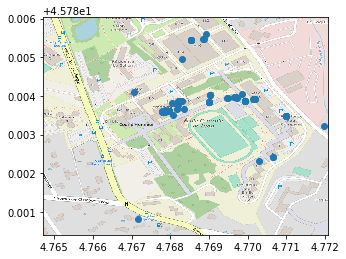

In [54]:
datafile3 = 'carte_centrale_petite.png'
img3 = plt.imread(datafile3)
plt.scatter(long1,lat1,zorder=1)

## Set figure width to 12 and height to 9
#fig_size[0] = 6.84*1.4
#fig_size[1] = 7.55*1.4
#plt.rcParams["figure.figsize"] = fig_size
#
##plt.axis('normal')
plt.axis.xlim = 7.55*4
plt.axis.ylim = 6.84*4

plt.imshow(img3,zorder=0,extent = [4.76471,4.77209,45.78041,45.78603])
plt.show()

# Affichage 3D

Je cherche à représenter une trajectoire sur une journée en 3D, avec la latitude et la longitude en abcisses et en ordonnées, et le temps sur l'axe z.

J'aimerais également projeter la carte du campus sur le plan latitude/longitude mais je n'y arrive pas. Je pense qu'il faut utiliser un patch du module mpl_toolkits.mplot3d mais j'ai du mal à en comprendre le fonctionnement pour l'instant.

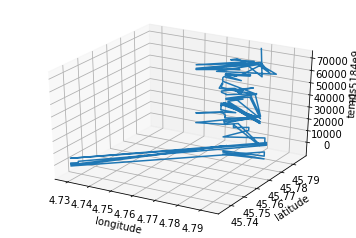

In [55]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('temps')

#with cbook.get_sample_data('carte_centrale_petite.png') as image_file:
#    image = plt.imread(image_file)
#im = ax.imshow(image)
#patch = patches.Circle((260, 200), radius=200, transform=ax.transData)
#im.set_clip_path(patch)

## Draw a circle on the x=0 'wall'
#p = Circle((5, 5), 3)
#ax.add_patch(p)
#art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")


#plt.imshow(img3,zorder=1,extent = [4.76471,4.77209,45.78041,45.78603])
plt.plot(long1,lat1,temps1)
#plt.plot(long1,lat1,temps1,marker = 'o')
plt.show()